# MSL ERA5 v0.2 (updated to August 2025)

https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels

#### ERA5 hourly data on single levels from 1940 to present

------- 73.35 ------  
-80.05 ------- -79.8    
------- 73.1 ------  

(get 4 closest grid cells)

Downloaded by Mickaël Lalande 27/03/2025 (extend August 2025 v0.2 18/07/2025)
  

In [1]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xskillscore as xs
import calendar
import os

In [2]:
# Bylot TUNDRA station (Domine et al., 2021: https://essd.copernicus.org/articles/13/4331/2021/)
lat = 73.1504
lon = -80.0046

In [3]:
path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot/ERA5'

In [4]:
ds_msl = xr.open_mfdataset(path+'/Mean_sea_level_pressure/*.nc')
ds_msl.load()

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 102807, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 822kB 2013-07-01 ... 2025-03-23T1...
  * latitude    (latitude) float64 16B 73.35 73.1
  * longitude   (longitude) float64 16B -80.05 -79.8
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    msl         (valid_time, latitude, longitude) float32 2MB 1.006e+05 ... 1...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-01T14:06 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
ds_msl_2025 = xr.open_mfdataset(path+'/Mean_sea_level_pressure/2025_v0.2/*.nc')
ds_msl_2025.load()

<xarray.Dataset> Size: 216kB
Dimensions:     (valid_time: 5393, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 43kB 2025-01-01 ... 2025-08-13T16...
  * latitude    (latitude) float64 16B 73.35 73.1
  * longitude   (longitude) float64 16B -80.05 -79.8
    expver      (valid_time) <U4 86kB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    msl         (valid_time, latitude, longitude) float32 86kB 1.03e+05 ... 1...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-18T16:08 GRIB to CDM+CF via cfgrib-0.9.1...

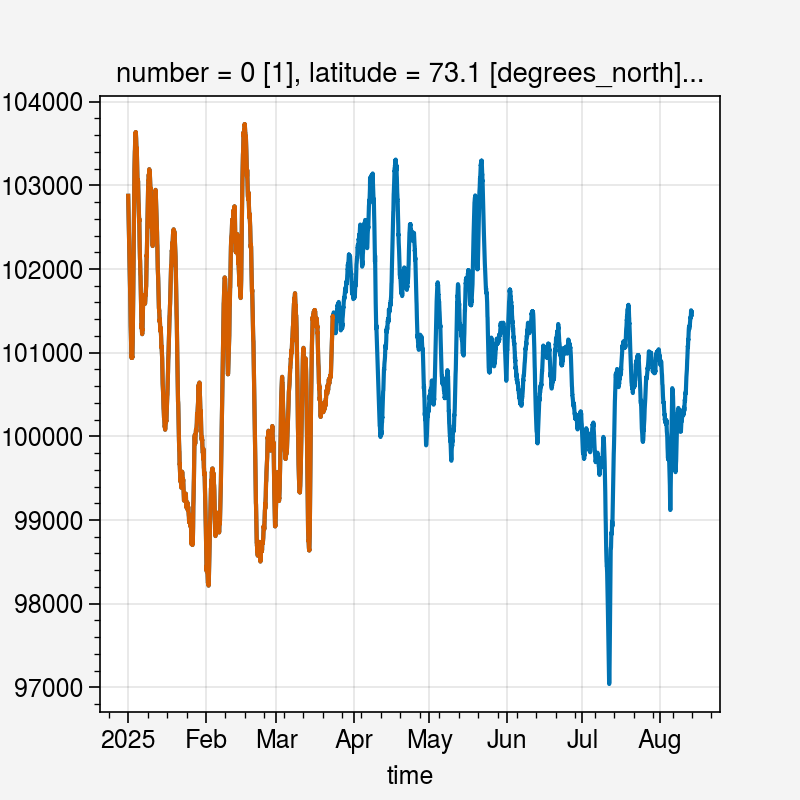

In [7]:
ds_msl_2025.msl.sel(latitude=73.1, longitude=-80.05).plot()
ds_msl.msl.sel(latitude=73.1, longitude=-80.05, valid_time='2025').plot()

In [8]:
ds_msl.sel(valid_time=slice('2013', '2024'))

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 100848, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 807kB 2013-07-01 ... 2024-12-31T2...
  * latitude    (latitude) float64 16B 73.35 73.1
  * longitude   (longitude) float64 16B -80.05 -79.8
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    msl         (valid_time, latitude, longitude) float32 2MB 1.006e+05 ... 1...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-01T14:06 GRIB to CDM+CF via cfgrib-0.9.1...

Be aware the expver 0005 is not the final version

In [9]:
ds_msl_2025

<xarray.Dataset> Size: 216kB
Dimensions:     (valid_time: 5393, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 43kB 2025-01-01 ... 2025-08-13T16...
  * latitude    (latitude) float64 16B 73.35 73.1
  * longitude   (longitude) float64 16B -80.05 -79.8
    expver      (valid_time) <U4 86kB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    msl         (valid_time, latitude, longitude) float32 86kB 1.03e+05 ... 1...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-08-18T16:08 GRIB to CDM+CF via cfgrib-0.9.1...

In [11]:
100848+5393

106241

In [12]:
ds_msl_concat = xr.concat([ds_msl.sel(valid_time=slice('2013', '2024')), ds_msl_2025], dim="valid_time")
ds_msl_concat

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 106241, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 850kB 2013-07-01 ... 2025-08-13T1...
  * latitude    (latitude) float64 16B 73.35 73.1
  * longitude   (longitude) float64 16B -80.05 -79.8
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    msl         (valid_time, latitude, longitude) float32 2MB 1.006e+05 ... 1...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-01T14:06 GRIB to CDM+CF via cfgrib-0.9.1...

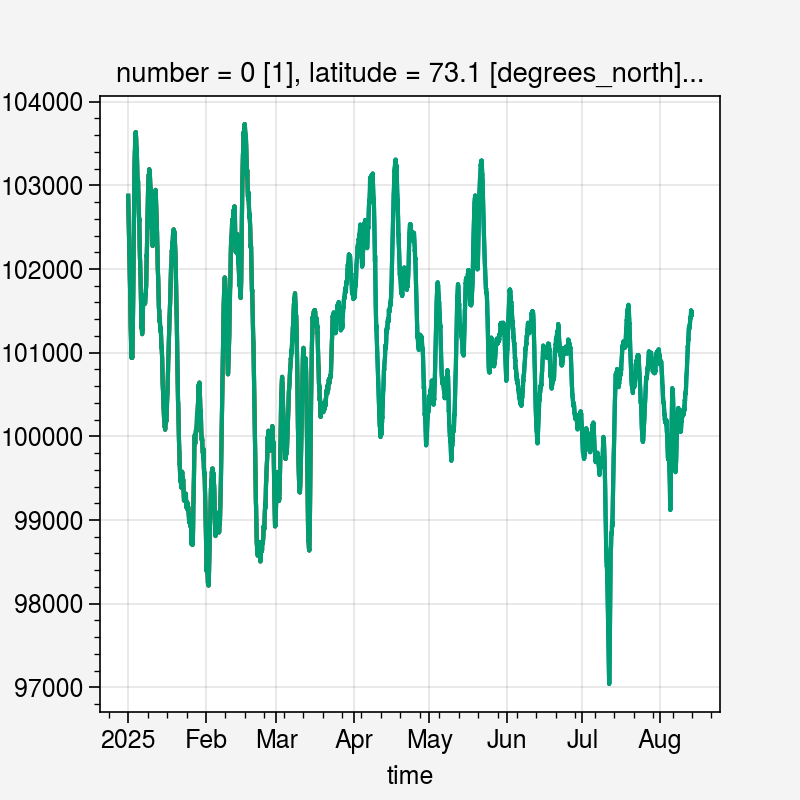

In [13]:
ds_msl_2025.msl.sel(latitude=73.1, longitude=-80.05).plot()
ds_msl.msl.sel(latitude=73.1, longitude=-80.05, valid_time='2025').plot()
ds_msl_concat.msl.sel(latitude=73.1, longitude=-80.05, valid_time='2025').plot()

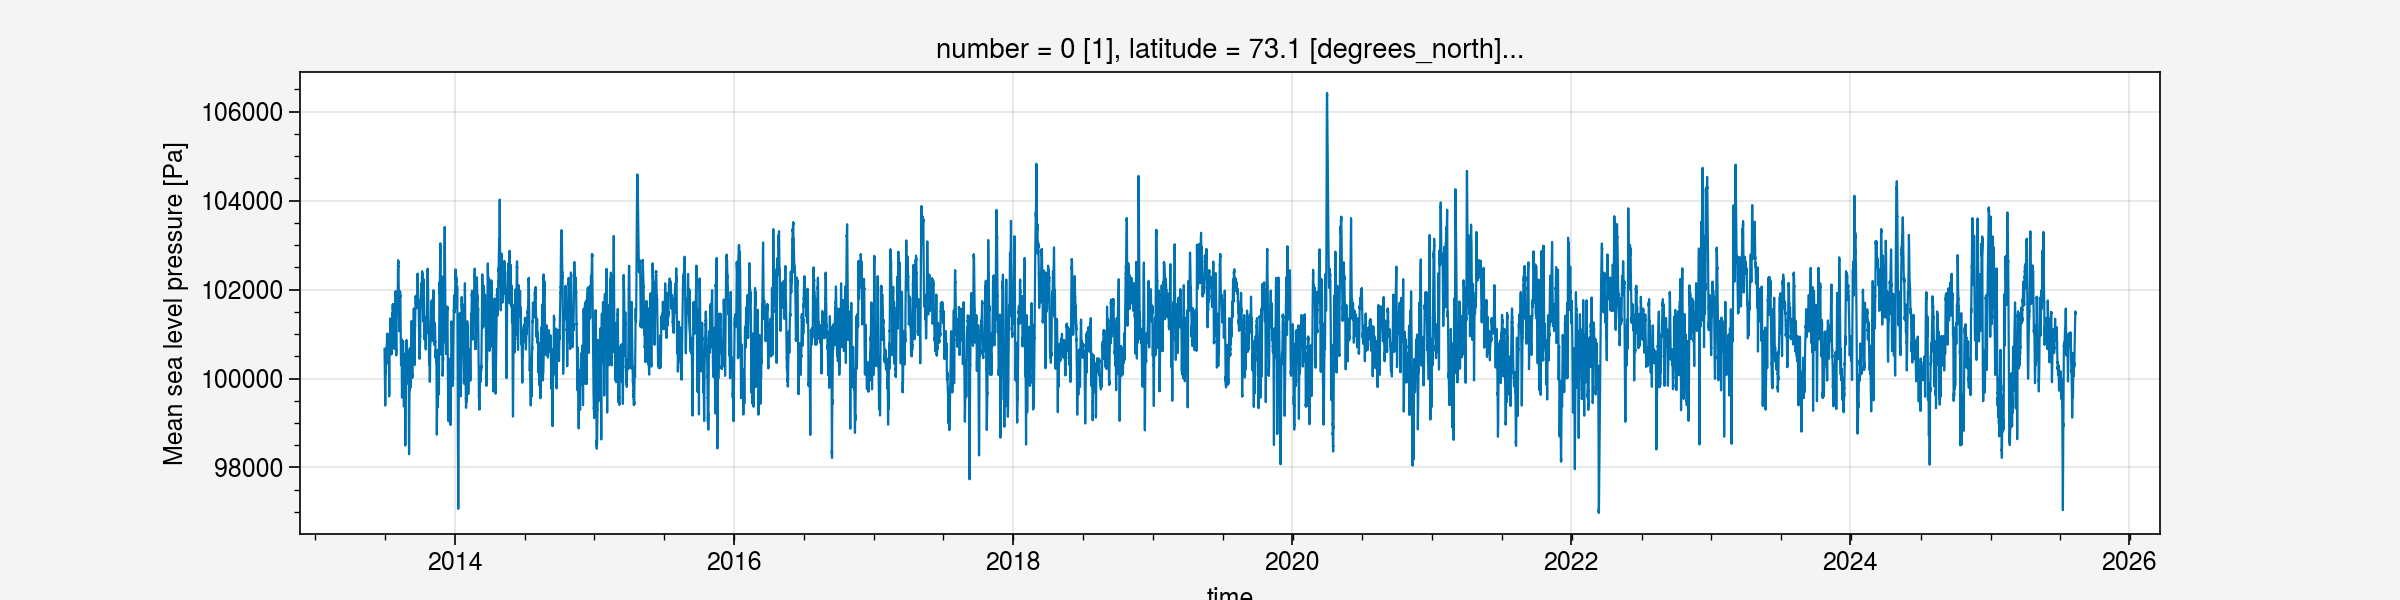

In [14]:
%matplotlib inline
ds_msl_concat.msl.sel(latitude=73.1, longitude=-80.05).plot(figsize=(12,3), lw=0.8)

## Gather all variable in one dataset

In [17]:
ds_all = ds_msl_concat
ds_all

<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 106241, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 850kB 2013-07-01 ... 2025-08-13T1...
  * latitude    (latitude) float64 16B 73.35 73.1
  * longitude   (longitude) float64 16B -80.05 -79.8
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
Data variables:
    msl         (valid_time, latitude, longitude) float32 2MB 1.006e+05 ... 1...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-01T14:06 GRIB to CDM+CF via cfgrib-0.9.1...

### Add Bylot TUNDRA coordinates

In [18]:
ds_all.latitude

<xarray.DataArray 'latitude' (latitude: 2)> Size: 16B
array([73.35, 73.1 ])
Coordinates:
    number    int64 8B 0
  * latitude  (latitude) float64 16B 73.35 73.1
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing

In [19]:
# Ajouter les nouvelles coordonnées
new_lats = np.sort(np.append(ds_all.latitude.values, lat))
new_lons = np.sort(np.append(ds_all.longitude.values, lon))

In [20]:
new_lats

array([73.1   , 73.1504, 73.35  ])

In [21]:
new_lons

array([-80.05  , -80.0046, -79.8   ])

In [22]:
ds_interp = ds_all.interp(latitude=new_lats, longitude=new_lons)
ds_interp

<xarray.Dataset> Size: 10MB
Dimensions:     (valid_time: 106241, latitude: 3, longitude: 3)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 850kB 2013-07-01 ... 2025-08-13T1...
    expver      (valid_time) <U4 2MB '0001' '0001' '0001' ... '0005' '0005'
  * latitude    (latitude) float64 24B 73.1 73.15 73.35
  * longitude   (longitude) float64 24B -80.05 -80.0 -79.8
Data variables:
    msl         (valid_time, latitude, longitude) float64 8MB 1.007e+05 ... 1...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-01T14:06 GRIB to CDM+CF via cfgrib-0.9.1...

In [23]:
import warnings
warnings.filterwarnings('ignore')

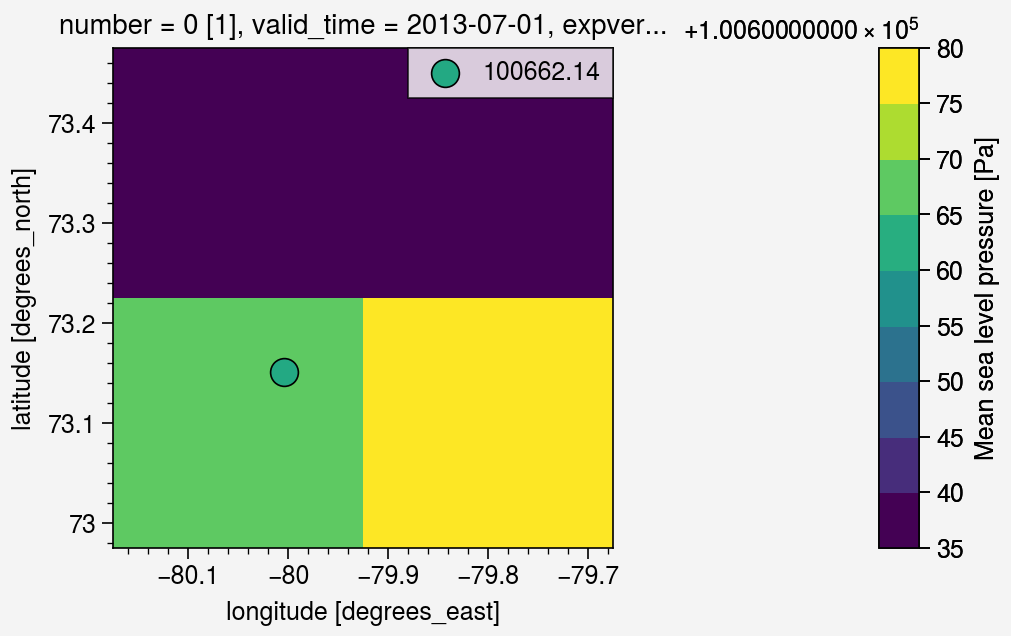

In [26]:
%matplotlib inline
fig, ax = pplt.subplots()

i_time = 0
pcolor = ds_all.msl[i_time].plot.pcolormesh(ax=ax)

# Récupérer les limites de la colorbar
vmin, vmax = pcolor.get_clim()

value = ds_interp.msl.sel(latitude=lat, longitude=lon)[i_time].item()  # Valeur scalaire

# Obtenir la couleur correspondante
import matplotlib.colors as mcolors  # Utilisation de matplotlib pour normaliser
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)  # Normalisation correcte
cmap = pcolor.get_cmap()
color = cmap(norm(value))  # Convertir la valeur en couleur

# Ajouter le point avec la bonne couleur
ax.scatter(lon, lat, color=color, edgecolors="black", s=100, label=f"{value:.2f}")

# Afficher la légende
ax.legend()
pplt.show()

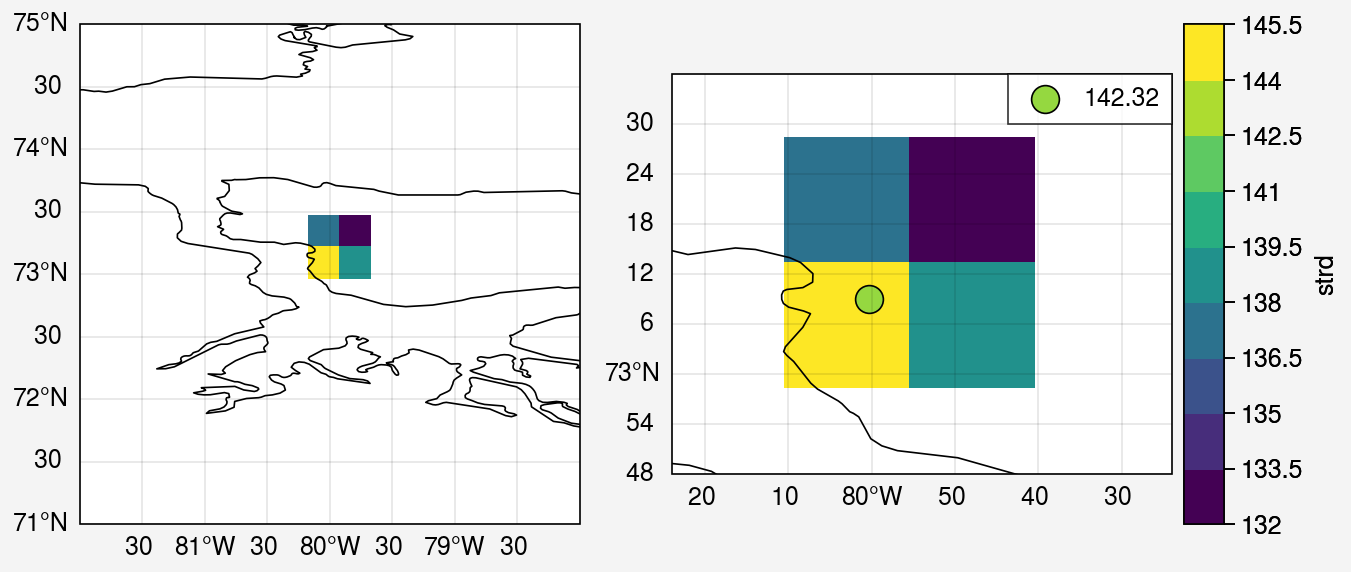

In [90]:
%matplotlib inline
fig, axs = pplt.subplots(proj='cyl', ncols=2)

i_time = 0
ax = axs[0]
ax.pcolormesh(ds_all.strd[i_time], cmap='viridis')

ax.format(
    borders=True, 
    coast=True, 
    labels=True, 
    latlim=(71, 75), 
    lonlim=(-82, -78),
    reso='hi'
)

ax = axs[1]
ax.pcolormesh(ds_all.strd[i_time], cmap='viridis', colorbar='r')

ax.format(
    borders=True, 
    coast=True, 
    labels=True, 
    latlim=(72.8, 73.6), 
    lonlim=(-79.4, -80.4),
    reso='hi'
)


# Récupérer les limites de la colorbar
vmin, vmax = pcolor.get_clim()

value = ds_interp.strd.sel(latitude=lat, longitude=lon)[i_time].item()  # Valeur scalaire

# Obtenir la couleur correspondante
import matplotlib.colors as mcolors  # Utilisation de matplotlib pour normaliser
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)  # Normalisation correcte
cmap = pcolor.get_cmap()
color = cmap(norm(value))  # Convertir la valeur en couleur

# Ajouter le point avec la bonne couleur
ax.scatter(lon, lat, color=color, edgecolors="black", s=100, label=f"{value:.2f}")
ax.legend()

#reso : {'lo', 'med', 'hi', 'x-hi', 'xx-hi'}, optional


In [27]:
ds_interp.latitude.values

array([73.1   , 73.1504, 73.35  ])

In [28]:
ds_interp.longitude.values

array([-80.05  , -80.0046, -79.8   ])

## Export data to .dat or .csv 
Only pixel including Bylot and interpolated values

In [29]:
ds_interp_out = ds_interp.drop('number').drop('expver').rename({'valid_time': 'time', 'latitude': 'lat', 'longitude': 'lon'})
ds_interp_out = ds_interp_out.sel(time=slice('2013-07', '2025-08'))

ds_interp_out_grid = ds_interp_out.sel(lat=73.1, lon=-80.05)
ds_interp_out_interp = ds_interp_out.sel(lat=73.1504, lon=-80.0046)
ds_interp_out_grid

<xarray.Dataset> Size: 2MB
Dimensions:  (time: 106241)
Coordinates:
  * time     (time) datetime64[ns] 850kB 2013-07-01 ... 2025-08-13T16:00:00
    lat      float64 8B 73.1
    lon      float64 8B -80.05
Data variables:
    msl      (time) float64 850kB 1.007e+05 1.006e+05 ... 1.015e+05 1.015e+05
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-01T14:06 GRIB to CDM+CF via cfgrib-0.9.1...

In [30]:
df_grid = ds_interp_out_grid.to_dataframe()
df_grid

,msl,lat,lon
time,,,
2013-07-01 00:00:00,100666.820312,73.1,-80.05
2013-07-01 01:00:00,100635.570312,73.1,-80.05
2013-07-01 02:00:00,100565.257812,73.1,-80.05
2013-07-01 03:00:00,100494.359375,73.1,-80.05
2013-07-01 04:00:00,100470.750000,73.1,-80.05
...,...,...,...
2025-08-13 12:00:00,101495.046875,73.1,-80.05
2025-08-13 13:00:00,101491.468750,73.1,-80.05
2025-08-13 14:00:00,101492.984375,73.1,-80.05


In [31]:
df_grid.to_csv(path+'/ERA5_h_msl_73.1N_80.05W_201307-202508_Bylot_UTC_0005_v0.2.csv')